# 데이터 준비

## MNIST 숫자 손글씨 Dataset 불러들이기
---

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
60000


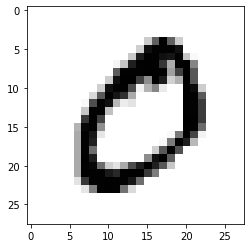

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


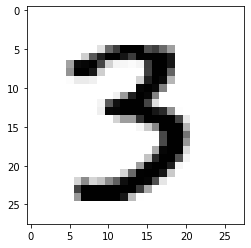

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

## 학습용 데이터와 시험용 데이터
---

In [5]:
print(x_test.shape)

(10000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


## 데이터 전처리 하기
---

In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 네트워크 설계

## Sequential Model을 사용해 보자
---

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 네트워크 학습

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4133 - accuracy: 0.8690
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

# 확인

## 테스트 데이터로 성능을 확인해 보자
---

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0341 - accuracy: 0.9902
test_loss: 0.034112755209207535 
test_accuracy: 0.9901999831199646


In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
print(predicted_labels)
idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

[7 2 1 ... 4 5 6]
model.predict() 결과 :  [1.4324933e-09 1.8474181e-11 8.0539962e-08 1.2529745e-06 6.0195356e-11
 3.0558149e-12 3.7814300e-17 9.9999845e-01 3.9757062e-10 2.4050206e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


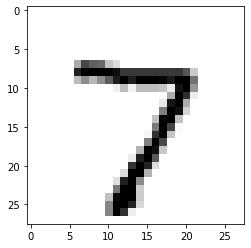

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.5468829e-01 8.1916196e-06 3.3416440e-05 3.8380920e-05 5.0707313e-04
 7.3091796e-04 7.4148995e-01 2.1746124e-13 2.4979350e-03 5.7949837e-06]
라벨: 0, 예측결과: 6


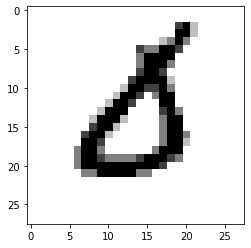

예측확률분포: [1.1669104e-04 2.7533889e-01 5.1714614e-04 1.3766730e-09 7.2192264e-01
 3.1713832e-08 3.9713959e-06 1.8641902e-03 2.3404615e-04 2.4734372e-06]
라벨: 1, 예측결과: 4


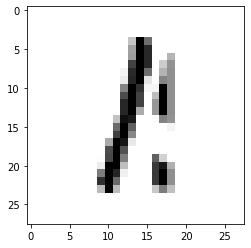

예측확률분포: [6.8617487e-01 9.2317658e-03 2.4221587e-01 1.8937403e-04 6.5139307e-07
 9.0644072e-08 1.0947795e-05 6.0376476e-02 1.3476355e-03 4.5222286e-04]
라벨: 2, 예측결과: 0


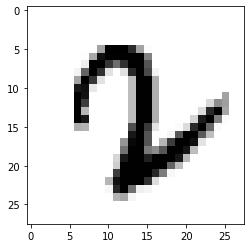

예측확률분포: [2.0795895e-04 2.2442489e-08 1.3227332e-05 3.6396327e-06 3.9370139e-08
 1.9999825e-04 3.5307956e-01 1.6090456e-16 6.4649296e-01 2.6525192e-06]
라벨: 6, 예측결과: 8


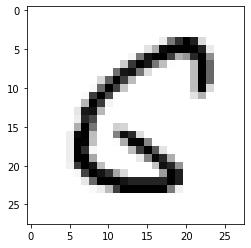

예측확률분포: [9.5338244e-09 7.4253898e-05 2.1628797e-02 9.7695065e-01 1.9390733e-12
 1.5424304e-11 5.1411203e-13 1.3452147e-03 8.5258927e-07 1.5601093e-07]
라벨: 2, 예측결과: 3


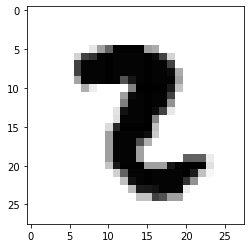

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 더 좋은 네트워크 만들어 보기

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               